CASE - 

We are going to predict at what price a that particular used car should be sold.

WORK FLOW -

Car data Collection

Data PreProcessing

Split data to Train & Test

Linear & Lasso Regression Model

Model Evaluation

Trained Linear & Lasso Regression Model

Test Data

Prediction

Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Importing Used Car Data

In [6]:
data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Used Car Price Prediction Using Linear &  Lasso Regression\car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Pre Processing

In [7]:
# Checking the shape of dataframe

data.shape

(301, 9)

In [8]:
# Checking missing values

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Statistical Measures of data

data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# Getting information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# Checking the distribution of categorical data

print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [12]:
# Encoding fuel type column

data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)

# Encoding seller type column

data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)

# Encoding transmission column

data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data & target

In [13]:
x = data.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = data['Selling_Price']

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting data into Train & Test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

1) Linear Regression

In [19]:
# Loading linear regression model

lin_reg = LinearRegression()

In [20]:
lin_reg.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [21]:
# prediction on training data

train_data_prediction = lin_reg.predict(x_train)

In [22]:
# R squared error

error_score = metrics.r2_score(y_train, train_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.87994516604937


Visualise the actual vs predicted prices on train data

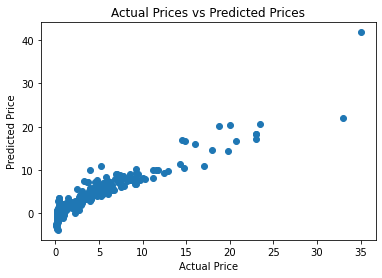

In [23]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [24]:
# prediction on testing data

test_data_prediction = lin_reg.predict(x_test)

In [25]:
# R squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8365766715024749


Visualise the actual vs predicted prices on test data

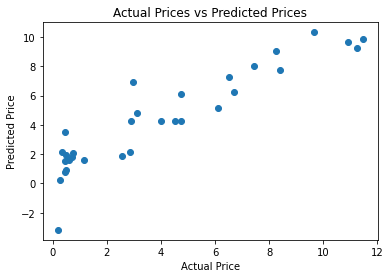

In [27]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

2) Lasso Regression

In [28]:
# Loading linear regression model

las_reg = Lasso()

In [29]:
las_reg.fit(x_train, y_train)

Lasso()

In [30]:
# prediction on training data

train_data_prediction = las_reg.predict(x_train)

In [31]:
# R squared error

error_score = metrics.r2_score(y_train, train_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8427856123435794


Visualise the actual vs predicted prices on train data

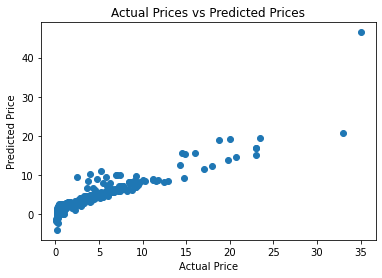

In [33]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [34]:
# prediction on testing data

test_data_prediction = las_reg.predict(x_test)

In [35]:
# R squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8709167941173195


Visualise the actual vs predicted prices on test data

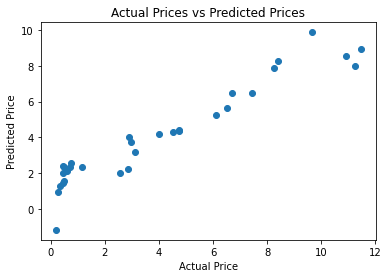

In [36]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

CONCLUSION - 

In this case Lasso Regression Model is performing very good